# 06. PyTorch Transfer Learning
What is transfer learning?

Transfer learning involves taking the parameters of what one model has learned on another dataset and applying to our own problem.
* Pretrained model = foundation models

In [1]:
import torch
import torchvision

from going_modular.train import train_dir, train_dataloader, test_dataloader

print(torch.__version__)
print(torchvision.__version__)

from going_modular import data_setup, engine

2.5.1
0.20.1


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else ("mps" if torch.mps.is_available() else "cpu"))
device

device(type='mps')

## 1. Get data
We need our pizza, steak, sushi data to build a transfer learning model on

In [9]:
import os
import zipfile

from pathlib import Path

import requests

# Setup data path
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi" # images from a subset of classes from the Food101 dataset

# If the image folder doesn't exist, download and prepare it...
if image_path.is_dir():
    print(f"{image_path} exists")
else:
    print(f"{image_path} does not exist, downloading it")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        f.write(request.content)

    # unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Extracting pizza_steak_sushi.zip")
        zip_ref.extractall(image_path)

    # Remove .zip file
    os.remove(data_path / "pizza_steak_sushi.zip")

data/pizza_steak_sushi does not exist, downloading it
Extracting pizza_steak_sushi.zip


In [10]:
# Setup directory path
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## 2. Create Datasets and DataLoaders

Now we've got the data, we want to turn it into PyTorch DataLoaders.

To do so, we can use `data_setup.py` and the `create_dataloaders()` function we made in 05. PyTorch Going Modular

In [ ]:
from going_modular import data_setup
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir, test_dir)

## 2.1 Creating a transform for torchvision. models (manual creation)
`torchvision.models` contains pretrained models (models ready for transfer learning) right within `torchvision`.

In [11]:
from Progress.course_progress_func import update_progress, progress_pie_chart, monthly_progress, progress_report_print
update_progress(video_index=187, done=False)

Updated progress report. 
Video: 186. Turning Our Data into DataLoaders with Manually Created Transforms 
Duration: 15m 
Status: Done 
Date: 14 Oct 2025 11:59 AM 
Section progress: 
Section : 8.PyTorch Transfer Learning
Status  : 14 videos remaining, 1h 56m to finish the section
Progress:  26%|███████▉                       5/19


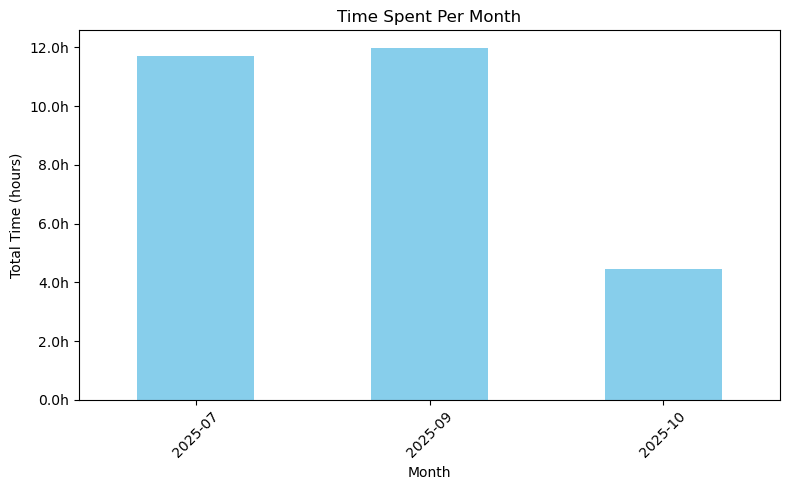